## Anaconda Scientific Python 3 Distribution

In [9]:
# setup matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
def f1(x, y):
    z = 0.0
    for i in range(x):
        for j in range(y):
            z = (z + i * j) / (1 + i + j)
    return z

import numba
@numba.jit("double(int32, int32)", nogil=True, nopython=True)
def f2(x, y):
    z = 0.0
    for i in range(x):
        for j in range(y):
            z = (z + i * j) / (1 + i + j)
    return z

In [11]:
%timeit f1(1111, 2222)

1 loops, best of 3: 1.08 s per loop


In [12]:
%timeit f2(1111, 2222)

10 loops, best of 3: 24.3 ms per loop


In [14]:
@numba.jit(nopython=True, nogil=True)
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x,y)
    z = 0j
    for i in range(max_iters):
        z = z*z + c
        if z.real * z.real + z.imag * z.imag >= 4:
            return 255 * i // max_iters

    return 255

@numba.jit(nopython=True)
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image


CPU times: user 844 ms, sys: 4 ms, total: 848 ms
Wall time: 857 ms


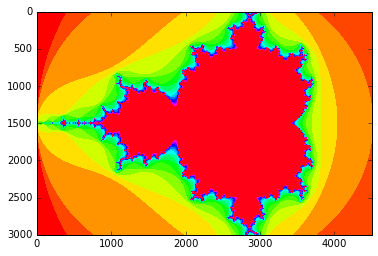

In [22]:
%matplotlib inline

import numpy as np
image = np.zeros((3000, 4500), dtype=np.uint8)
%time create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)

plt.imshow(image)
plt.hsv()
plt.show()

http://scikit-learn.org/stable/auto_examples/cluster/plot_lena_ward_segmentation.html

Compute structured hierarchical clustering...
Elapsed time:  8.465419292449951
Number of pixels:  65536
Number of clusters:  15


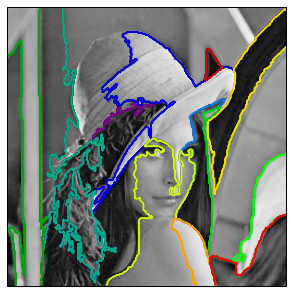

In [19]:
import time as time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

###############################################################################
# Generate data
lena = sp.misc.lena()
# Downsample the image by a factor of 4
lena = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]
X = np.reshape(lena, (-1, 1))

###############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*lena.shape)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
label = np.reshape(ward.labels_, lena.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

###############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(lena, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

http://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html

Compute unstructured hierarchical clustering...
Elapsed time: 0.75s
Number of points: 1500
Compute structured hierarchical clustering...
Elapsed time: 0.22s
Number of points: 1500


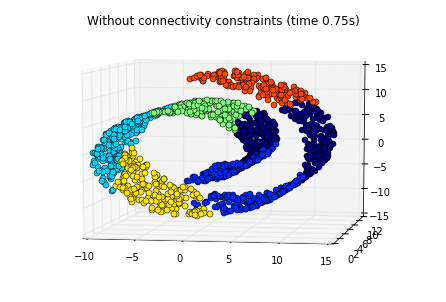

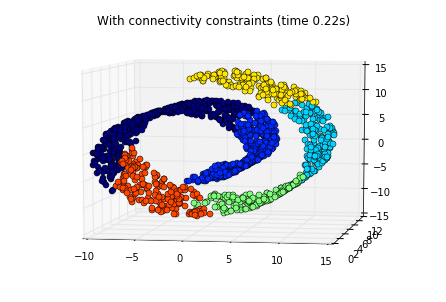

In [20]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll

###############################################################################
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
# Make it thinner
X[:, 1] *= .5

###############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

###############################################################################
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=plt.cm.jet(np.float(l) / np.max(label + 1)))
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)


###############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

###############################################################################
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=plt.cm.jet(float(l) / np.max(label + 1)))
plt.title('With connectivity constraints (time %.2fs)' % elapsed_time)

plt.show()